<a href="https://colab.research.google.com/github/chrishuskey/DS-Unit-2-Kaggle-Challenge/blob/master/Assignment_DS_221_Kaggle_Challenge_1_Submission01_20191105_0125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [✓] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [✓] Do train/validate/test split with the Tanzania Waterpumps data.
- [✓] Begin with baselines for classification.
- [✓] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [✓] Get your validation accuracy score.
- [✓] Get and plot your feature importances.
- [✓] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [✓] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [✓] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


# **Setup & Import Dataset:**

In [0]:
# Import libraries used:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setup data path -- where we can get the data files from:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 133kB 4.9MB/s 
     |████████████████████████████████| 614kB 45.6MB/s 
     |████████████████████████████████| 235kB 53.9MB/s 
     |████████████████████████████████| 307kB 31.2MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 215kB 52.1MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 737kB 50.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=ef5240d0ba292a008a01af84b6fddae7e3f280c1df4cacb0d2e26f28057accff
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=107b1dd15ad8a89910bc7872151d5b3a899a6ccc668e628aa7e61a8ab790f5b7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d

In [0]:
# Make dataframes with Kaggle's train CSV and test CSV for the Tanzania 
# water dataset:
working_data = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [0]:
# Separate the Kaggle train CSV data into our training and validation sets:
train, val = train_test_split(working_data, train_size=0.75, stratify=working_data['status_group'], random_state=42)  # Note to self: "stratify=" here isn't actually a stratified sample (which would have heterogeneous strata, each of which contains homogeneous data points), but more like dividing into clusters: the different clusters are homogeneous (each with the same proportions of the specific variable), but have heterogeneous observations within them (e.g., both 'functional' and 'non-functional' in this case).
# [?? To do: Remove random_state when finished ??]

# **Data Prep.**

In [0]:
def data_prep(df):
  """Implement all data prep. on all data (train, val and test sets) in the same way."""
  # Make a copy to operate on:
  dataframe = df.copy()
  
  # Change to best data types:
  dataframe['date_recorded'] = pd.to_datetime(dataframe['date_recorded'], infer_datetime_format=True)
  
  # Drop less useful columns:
  dataframe.drop(columns=['amount_tsh', 'num_private', 'payment', 'quantity_group'], inplace=True)  
  # Re 'amount_tsh':  Approx. 70% of the values in this column are zero (0.0 static head is impossible, I think?), and many others seem high or even impossible (is a static head of e.g. 15000 meters even possible for a small village pump??) --> let's just drop this feature completely.
  # Re 'num_private':  Almost all 0's (public use).  For remaining 1%, unclear what the difference between private use = 1 or 50 or 17 is.
  # Re 'payment':  This feature is redundant, same as 'payment_type'.
  # Re 'quantity_group':  Redundant, same as 'quantity' column.

  # New features:
  dataframe['date_recorded_year'] = dataframe['date_recorded'].dt.year
  dataframe['years_from_construction_to_recorded'] = dataframe['date_recorded_year'] - dataframe['construction_year']
  dataframe['years_from_construction_to_recorded'] = np.where(dataframe['years_from_construction_to_recorded'] < 0, np.NaN, dataframe['years_from_construction_to_recorded'])
  dataframe['years_from_construction_to_recorded'] = np.where(dataframe['years_from_construction_to_recorded'] > 100, np.NaN, dataframe['years_from_construction_to_recorded'])
  
  # Replace other missing value markers with NaN:
  
  # Zeros --> NaN (in columns with zeros that clearly represent NaNs):
  cols_with_zeros = ['construction_year', 'gps_height', 'longitude', 'latitude', 'installer', 'population']
  for col in cols_with_zeros:
    dataframe[col].replace({0: np.NaN, -2.000000e-08: np.NaN}, inplace=True)

  # "None"/"none"/"0" (as a string) --> NaN:
  cols_with_none = ['funder', 'wpt_name', 'scheme_management', 'scheme_name']
  for col in cols_with_none:
    dataframe[col].replace({r'[Nn]one': np.NaN, '0': np.NaN}, regex=True, inplace=True)
  
  # "Unknown" (string) --> NaN:
  cols_with_unknown = ['management', 'management_group', 'payment_type', 
                       'water_quality', 'quality_group', 'quantity', 'source', 
                       'source_type', 'source_class']
  for col in cols_with_unknown:
    dataframe[col].replace({r'[Uu]nknown': np.NaN}, regex=True, inplace=True)

  return dataframe

In [0]:
# Data prep. for all:
train = data_prep(train)
val = data_prep(val)
test = data_prep(test)

In [8]:
# Take a look at our training data with Pandas profiling:
import pandas_profiling

train_profile_report = train.profile_report(
    check_correlation_pearson=False, 
    correlations={
        'pearson': False, 
        'spearman': False, 
        'kendall': False, 
        'phi_k': False, 
        'cramers': False, 
        'recoded':False
    }, 
    plot={'histogram': {'bayesian_blocks_bins': False}}
)
train_profile_report

# **Feature Selection:**

In [0]:
# Target:  'status_group' feature:
target = 'status_group'

# Datafram of features only (to match test dataframe dimensions):
train_features = train.drop(columns=[target])

# List of numeric features:
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# List of categorical features:
cardinality = train_features.select_dtypes(exclude='number').nunique()

# List of all categorical features we can encode (nunique values = cardinality <= 50):
categorical_features = cardinality[cardinality <= 30].index.tolist()

# Combine to get list of all features we can either (a) work with directly 
# (numeric) or (b) encode (categorical with <= 30 unique values):
features = numeric_features + categorical_features

In [0]:
# [?? To do: Below, then clean up this cell ??]
# # Good:
# 'date_recorded'
# 'longitude',
# 'latitude'

# # Good:  To encode:
# 'basin'
# 'region_code'
# 'district_code', 
# 'extraction_type_class'
# 'management', 
# 'management_group', 
# 'payment_type'
# 'quantity'
# 'source_type', 
# 'source_class'
# 'water_quality'
# 'waterpoint_type'


# # Might as well include:
# 'public_meeting',
# 'permit'

# # Redundant:
# 'region'
# 'extraction_type', 
# 'extraction_type_group'
# 'scheme_management'
# 'source'
# 'quality_group'
# 'waterpoint_type_group', 

# # Too many missing values:
# 'construction_year'
# 'years_from_construction_to_recorded'
# 'gps_height'
# 'population'

In [0]:
# Features matrices and target vectors for train and val sets:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Check to make sure X matrices have the same numbers of columns:
assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1]

# **Baseline Models:**

**Baseline 1:  Dummy Model:  Majority Classifier:**

In [12]:
y_train.value_counts(dropna=False, normalize=True)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

In [0]:
majority_class = y_train.mode()[0]

In [14]:
# Get accuracy score for our Baseline 1: Dummy Majority Classifier Model:
y_true_baseline1 = y_train
y_pred_baseline1 = [majority_class] * len(train['status_group'])
print('Baseline 1:  Dummy Model Majority Classifier Performance:\n')
print(f'Accuracy: {accuracy_score(y_true_baseline1, y_pred_baseline1):.2f}')
recall_baseline1 = recall_score(y_true_baseline1, y_pred_baseline1, average='micro')
print(f'Recall (TP / (TP + FN)): {recall_baseline1:.2f}\n')

Baseline 1:  Dummy Model Majority Classifier Performance:

Accuracy: 0.54
Recall (TP / (TP + FN)): 0.54



In [15]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized) for reference:')
cm_baseline1 = pd.DataFrame(confusion_matrix(y_true_baseline1, y_pred_baseline1), index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_baseline1 / cm_baseline1.sum().sum()).sum().sum(), 10) == 1.0
cm_baseline1_normalized = cm_baseline1 / cm_baseline1.sum().sum()
cm_baseline1_normalized

Confusion matrix (normalized) for reference:


Predicted 0: Functional  ...  Predicted 2: Non Functional
Actual 0: Functional                              0.543075  ...                          0.0
Actual 1: Functional Needs Repair                 0.072682  ...                          0.0
Actual 2: Non Functional                          0.384242  ...                          0.0

[3 rows x 3 columns]

**Baseline 2:  k-means Clustering:**

In [0]:
# [?? To do:  Try k-means tomorrow ??]

**Baseline 3:  LogisticRegression Classifier:**

In [17]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1, random_state=42)  # [?? To do:  Remove random_state ??]
)

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_baseline3_train = y_train
y_pred_baseline3_train = pipeline.predict(X_train)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_baseline3_train, y_pred_baseline3_train):.2f}')
recall_baseline3_train = recall_score(y_true_baseline3_train, y_pred_baseline3_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_baseline3_train:.2f}\n')

Model performance on training set:

Training set accuracy: 0.74
Training set recall (TP / (TP + FN)): 0.74



In [18]:
# Apply to validation data and get score:
y_true_baseline3_val = y_val
y_pred_baseline3_val = pipeline.predict(X_val)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_baseline3_val, y_pred_baseline3_val):.2f}')
recall_baseline3_val = recall_score(y_true_baseline3_val, y_pred_baseline3_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_baseline3_val:.2f}\n')
print(f'Validation set accuracy: {pipeline.score(X_val, y_val):.2f}')

Model performance on validation set:

Validation set accuracy: 0.74
Validation set recall (TP / (TP + FN)): 0.74

Validation set accuracy: 0.74


In [19]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_baseline3 = pd.DataFrame(confusion_matrix(y_true_baseline3_val, y_pred_baseline3_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_baseline3 / cm_baseline3.sum().sum()).sum().sum(), 10) == 1.0
cm_baseline3_normalized = cm_baseline3 / cm_baseline3.sum().sum()
cm_baseline3_normalized

Confusion matrix (normalized):


0         1         2
0  0.484714  0.002896  0.055488
1  0.054680  0.004512  0.013468
2  0.133535  0.002357  0.248350

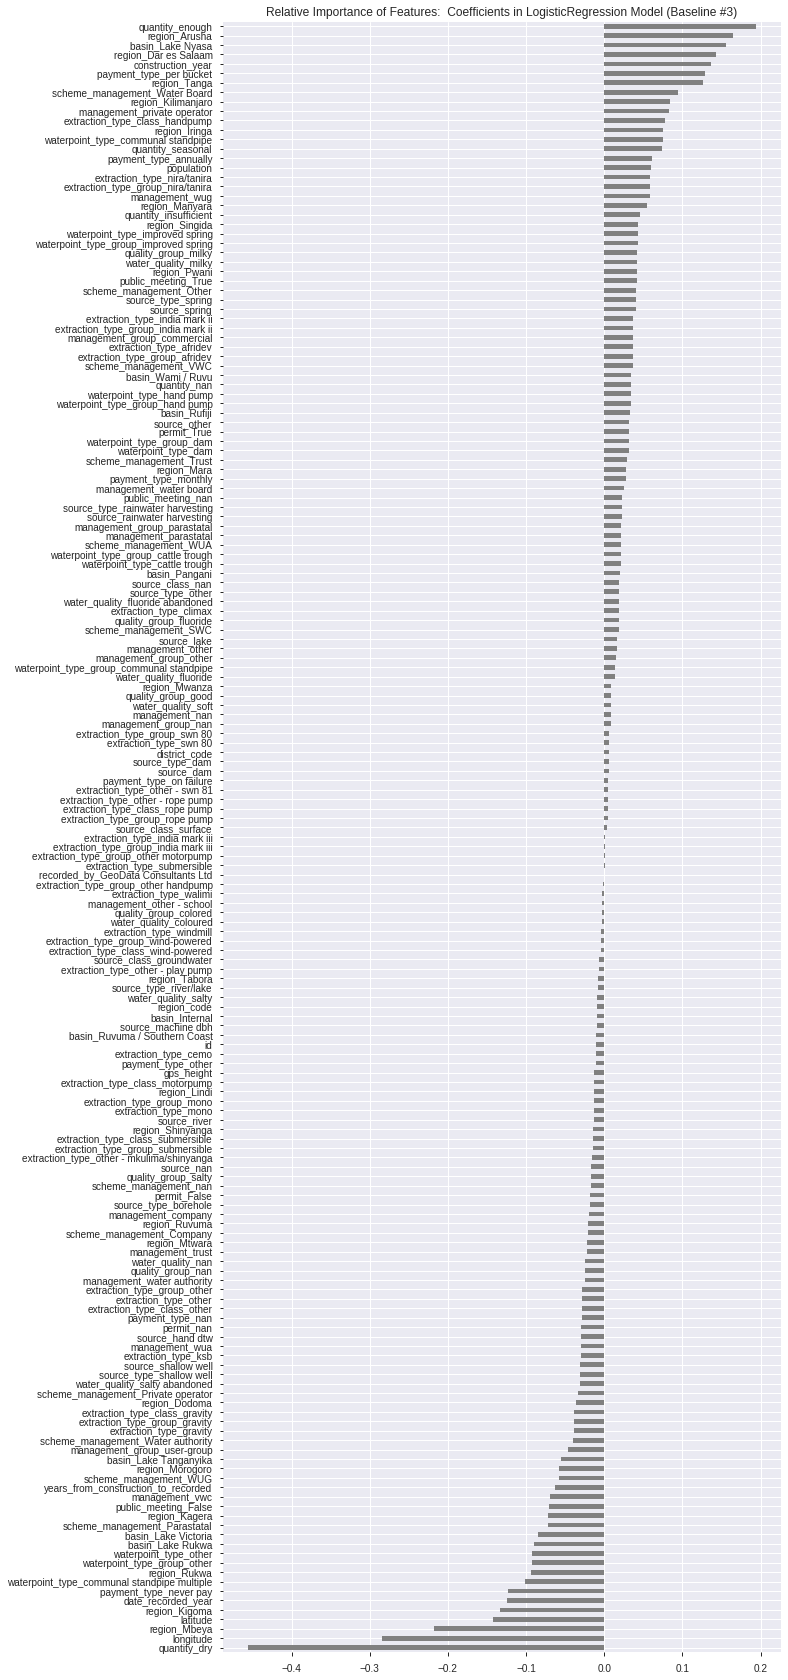

In [28]:
# Feature importances:  Get coefficients of LogisticRegression model to see 
# which features have more of an impact on the model's predictions:
%matplotlib inline
import matplotlib.pyplot as plt

baseline3_logreg = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(baseline3_logreg.coef_[0], encoded_columns)
plt.figure(figsize=(10, 30))
coefficients.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in LogisticRegression Model (Baseline #3)')
plt.show()

**Baseline 4:  Simple Single DecisionTree:**

In [30]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    DecisionTreeClassifier(max_depth=20, random_state=42)  # max_depth=20, min_samples_leaf=5, min_samples_split=10, min_weight_fraction_leaf=0.001 ??
      # [?? To do:  Remove random_state ??]
)

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_b4_train = y_train
y_pred_b4_train = pipeline.predict(X_train)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_b4_train, y_pred_b4_train):.2f}')
recall_b4_train = recall_score(y_true_b4_train, y_pred_b4_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_b4_train:.2f}\n')

Model performance on training set:

Training set accuracy: 0.90
Training set recall (TP / (TP + FN)): 0.90



In [31]:
# Apply to validation data and get score:
y_true_b4_val = y_val
y_pred_b4_val = pipeline.predict(X_val)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_b4_val, y_pred_b4_val):.2f}')
recall_b4_val = recall_score(y_true_b4_val, y_pred_b4_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_b4_val:.2f}\n')

Model performance on validation set:

Validation set accuracy: 0.77
Validation set recall (TP / (TP + FN)): 0.77



In [32]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_b4 = pd.DataFrame(confusion_matrix(y_true_b4_val, y_pred_b4_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_b4 / cm_b4.sum().sum()).sum().sum(), 10) == 1.0
cm_b4_normalized = cm_b4 / cm_b4.sum().sum()
cm_b4_normalized

Confusion matrix (normalized):


0         1         2
0  0.471178  0.018047  0.053872
1  0.040943  0.019933  0.011785
2  0.097576  0.009630  0.277037

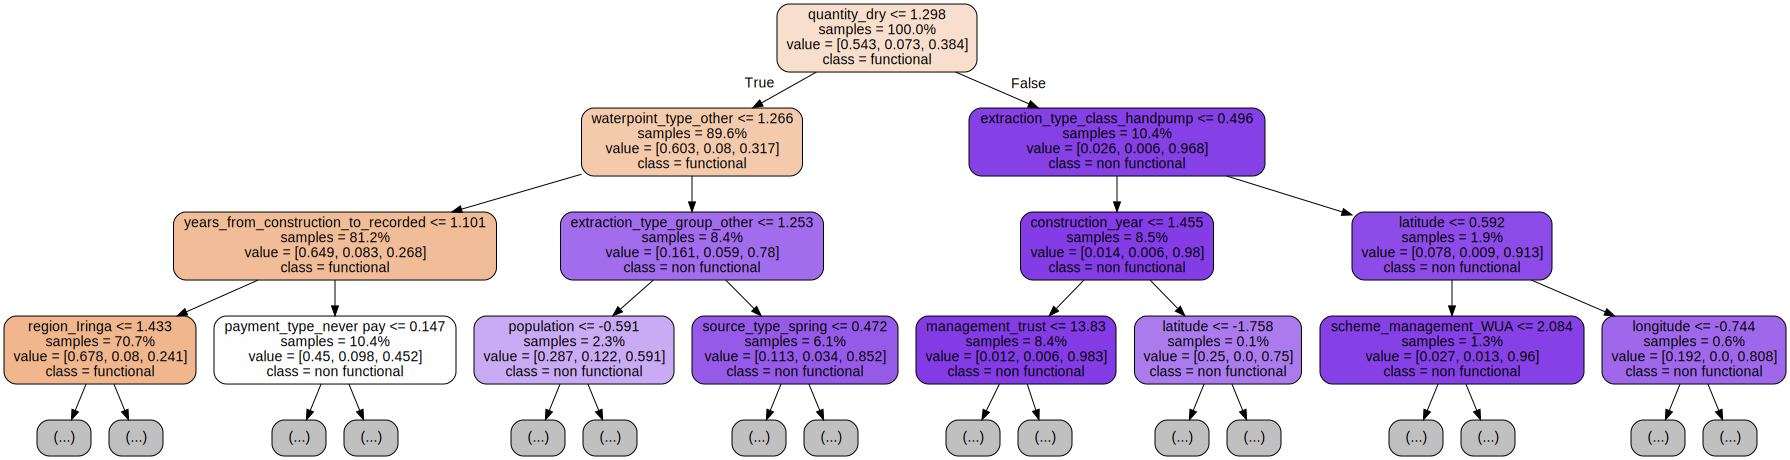

In [35]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

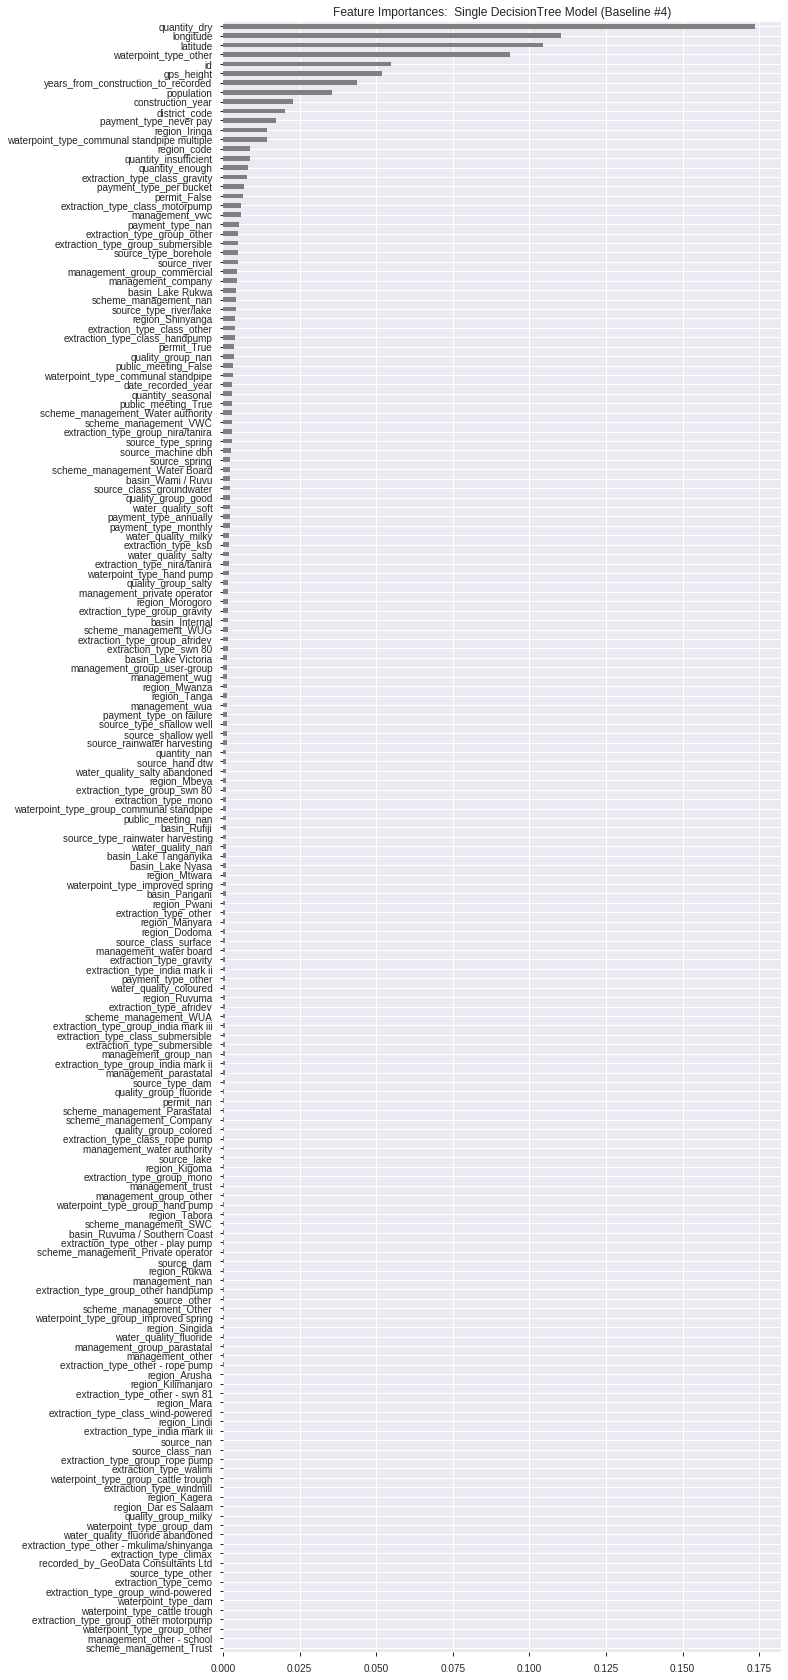

In [36]:
# Feature Importances:
baseline4_decisiontree = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(baseline4_decisiontree.feature_importances_, encoded_columns)
plt.figure(figsize=(10, 30))
importances.sort_values().plot.barh(color='grey')
plt.title('Feature Importances:  Single DecisionTree Model (Baseline #4)')
plt.show()

# **Models/Predictions:**

**Model 1:  LogisticRegression With Cross-validation:**

In [41]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegressionCV(multi_class='auto', cv=StratifiedKFold(n_splits=5), scoring='accuracy', solver='lbfgs', n_jobs=-1, random_state=42)  # [?? To do:  Remove random_state ??]  # max_iter=100 if takes too long
)

# Fit on training data:
pipeline.fit(X_train, y_train)

# Performance on training data:
y_true_m1_train = y_train
y_pred_m1_train = pipeline.predict(X_train)
print('Model performance on training set:\n')
print(f'Training set accuracy: {accuracy_score(y_true_m1_train, y_pred_m1_train):.2f}')
recall_m1_train = recall_score(y_true_m1_train, y_pred_m1_train, average='micro')
print(f'Training set recall (TP / (TP + FN)): {recall_m1_train:.2f}\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Model performance on training set:

Training set accuracy: 0.74
Training set recall (TP / (TP + FN)): 0.74



In [42]:
# Apply to validation data and get score:
y_true_m1_val = y_val
y_pred_m1_val = pipeline.predict(X_val)
print('Model performance on validation set:\n')
print(f'Validation set accuracy: {accuracy_score(y_true_m1_val, y_pred_m1_val):.2f}')
recall_m1_val = recall_score(y_true_m1_val, y_pred_m1_val, average='micro')
print(f'Validation set recall (TP / (TP + FN)): {recall_m1_val:.2f}\n')

Model performance on validation set:

Validation set accuracy: 0.74
Validation set recall (TP / (TP + FN)): 0.74



In [43]:
# Confusion matrix (normalized):
print('Confusion matrix (normalized):')
cm_m1 = pd.DataFrame(confusion_matrix(y_true_m1_val, y_pred_m1_val)) # index=['Actual 0: Functional', 'Actual 1: Functional Needs Repair', 'Actual 2: Non Functional'], columns=['Predicted 0: Functional', 'Predicted 1: Functional Needs Repair', 'Predicted 2: Non Functional'])

# Normalize it:
assert round((cm_m1 / cm_m1.sum().sum()).sum().sum(), 10) == 1.0
cm_m1_normalized = cm_m1 / cm_m1.sum().sum()
cm_m1_normalized

Confusion matrix (normalized):


0         1         2
0  0.484848  0.002761  0.055488
1  0.054680  0.004512  0.013468
2  0.133603  0.002290  0.248350

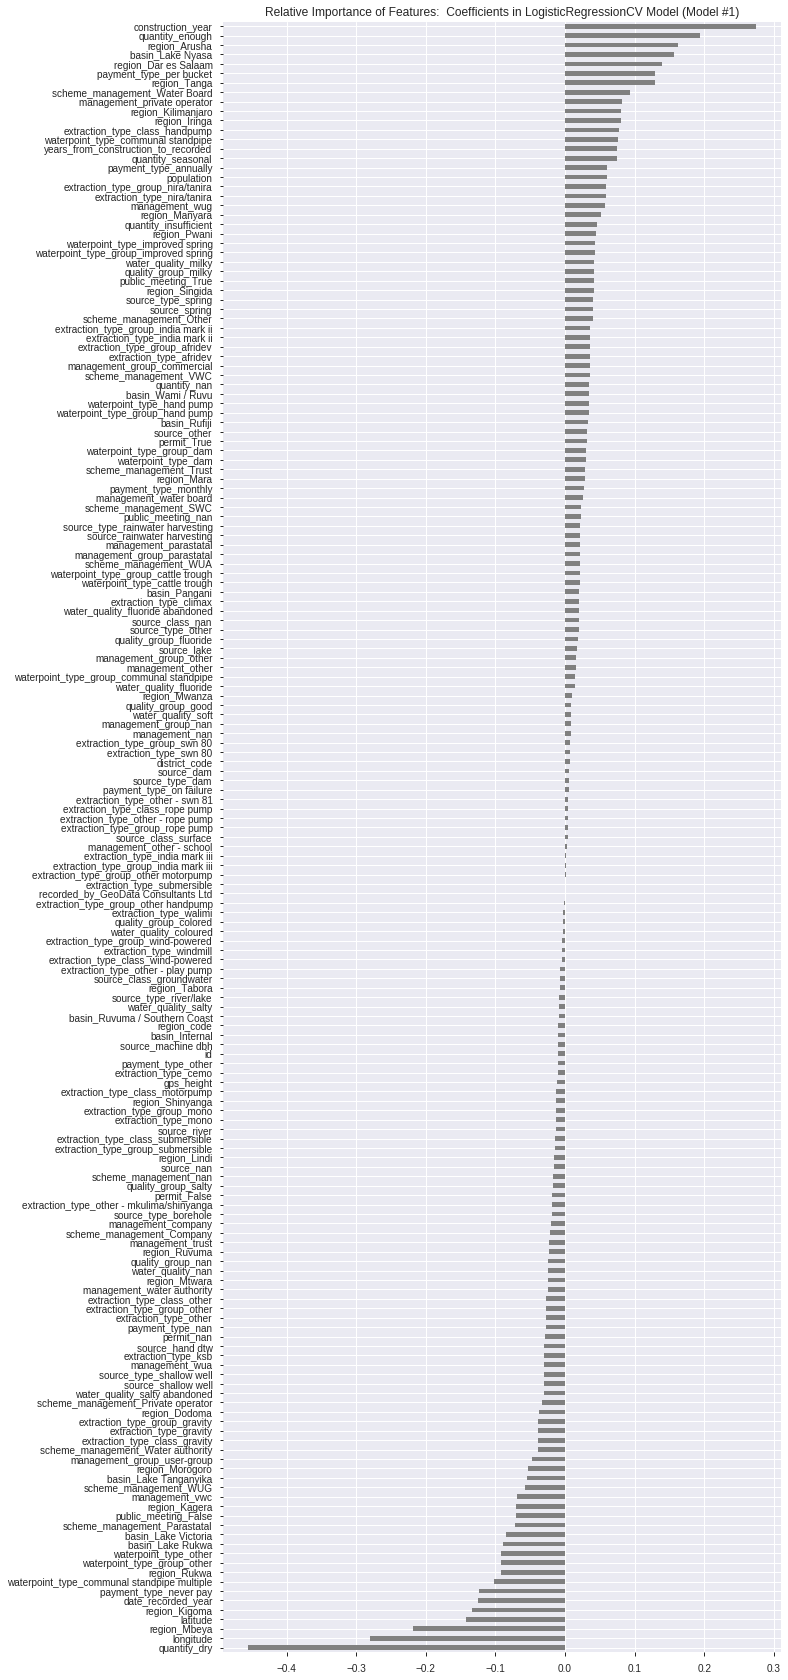

In [47]:
# Feature importances:  Get coefficients of LogisticRegressionCV model to see 
# which features have more of an impact on the model's predictions:
%matplotlib inline
import matplotlib.pyplot as plt

m1_logregcv = pipeline.named_steps['logisticregressioncv']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(m1_logregcv.coef_[0], encoded_columns)
plt.figure(figsize=(10, 30))
coefficients.sort_values().plot.barh(color='grey')
plt.title('Relative Importance of Features:  Coefficients in LogisticRegressionCV Model (Model #1)')
plt.show()

**Model 2:  RandomForest Classifier:**

In [0]:
# [?? To do ??]

**Model 3:  Gradient-Boosted Trees Ensemble:**

In [0]:
# [?? To do tomorrow ??]

**Model 4:  ExtraTreesClassifier With Cross-validation and Hyperparameter Tuner:**

In [0]:
# [?? To do tomorrow ??]

In [0]:
# [?? To do tomorrow ??]

In [0]:
# train.to_csv('train_to_csv.csv')

In [0]:
# from google.colab import files
# files.download('train_to_csv.csv')

In [0]:
# # Download the CSV for submission to Kaggle:
# from google.colab import files
# files.download('chris_huskey_submission_01_20191105_0125.csv')

In [0]:
# # Apply to test data and get CSV of predictions for Kaggle:
# y_pred_b4_test = pipeline.predict(X_test)

# # Make the Kaggle submission dataframe for export as CSV:
# submission_1105_0120 = sample_submission.copy()
# submission_1105_0120['status_group'] = y_pred_b4_test

# # Export as CSV file:
# submission_1105_0120.to_csv('chris_huskey_submission_01_20191105_0125.csv', index=False)